# Muertos de COVID-19
#### Análisis espacial

In [51]:
import os
import pandas as pd

csv_rip = os.path.join("data", "fallecidos_covid.csv")
deaths = pd.read_csv(csv_rip, delimiter=';')

In [53]:
deaths.head()

,FECHA_CORTE,FECHA_FALLECIMIENTO,EDAD_DECLARADA,SEXO,CLASIFICACION_DEF,DEPARTAMENTO,PROVINCIA,DISTRITO,UBIGEO,UUID
0,20240317,20220219,63,MASCULINO,Criterio virológico,TUMBES,TUMBES,TUMBES,240101.0,203506.0
1,20240317,20210529,74,MASCULINO,Criterio virológico,TUMBES,TUMBES,TUMBES,240101.0,203532.0
2,20240317,20210623,72,FEMENINO,Criterio SINADEF,TACNA,TACNA,ALTO DE LA ALIANZA,230102.0,203584.0
3,20240317,20210824,85,MASCULINO,Criterio investigación Epidemiológica,TUMBES,TUMBES,TUMBES,240101.0,212541.0
4,20240317,20210627,46,MASCULINO,Criterio virológico,TACNA,TACNA,ALTO DE LA ALIANZA,230102.0,203665.0


In [55]:
deaths['FECHA_FALLECIMIENTO'] = deaths['FECHA_FALLECIMIENTO'].astype(str)
deaths['ano'] = deaths['FECHA_FALLECIMIENTO'].str[:4]
deaths.head()

,FECHA_CORTE,FECHA_FALLECIMIENTO,EDAD_DECLARADA,SEXO,CLASIFICACION_DEF,DEPARTAMENTO,PROVINCIA,DISTRITO,UBIGEO,UUID,ano
0,20240317,20220219,63,MASCULINO,Criterio virológico,TUMBES,TUMBES,TUMBES,240101.0,203506.0,2022
1,20240317,20210529,74,MASCULINO,Criterio virológico,TUMBES,TUMBES,TUMBES,240101.0,203532.0,2021
2,20240317,20210623,72,FEMENINO,Criterio SINADEF,TACNA,TACNA,ALTO DE LA ALIANZA,230102.0,203584.0,2021
3,20240317,20210824,85,MASCULINO,Criterio investigación Epidemiológica,TUMBES,TUMBES,TUMBES,240101.0,212541.0,2021
4,20240317,20210627,46,MASCULINO,Criterio virológico,TACNA,TACNA,ALTO DE LA ALIANZA,230102.0,203665.0,2021


In [57]:
deaths['ano'] = deaths['ano'].astype(str)

In [59]:
deaths['ano'] = pd.to_numeric(deaths['ano'], errors='coerce')

In [61]:
deaths.dtypes

FECHA_CORTE              int64
FECHA_FALLECIMIENTO     object
EDAD_DECLARADA           int64
SEXO                    object
CLASIFICACION_DEF       object
DEPARTAMENTO            object
PROVINCIA               object
DISTRITO                object
UBIGEO                 float64
UUID                   float64
ano                      int64
dtype: object

In [63]:
# Eliminar filas donde 'FECHA_FALLECIMIENTO' sea NaN
deaths = deaths.dropna(subset=['ano'])

# Convertir la columna de float64 a int64
deaths['ano'] = deaths['ano'].astype('int64')

deaths.head()
deaths.dtypes

FECHA_CORTE              int64
FECHA_FALLECIMIENTO     object
EDAD_DECLARADA           int64
SEXO                    object
CLASIFICACION_DEF       object
DEPARTAMENTO            object
PROVINCIA               object
DISTRITO                object
UBIGEO                 float64
UUID                   float64
ano                      int64
dtype: object

In [65]:
deaths = deaths[deaths['ano'] >= 2020]

### Reshape

In [68]:
indexList=['DEPARTAMENTO','PROVINCIA']
aggregator={'ano':[len]}
deaths_provYear=deaths.groupby(indexList,observed=True).agg(aggregator)
deaths_provYear

ano
                                len
DEPARTAMENTO PROVINCIA             
AMAZONAS     BAGUA              462
             BONGARA             72
             CHACHAPOYAS        281
             CONDORCANQUI       111
             LUYA                88
...                             ...
TUMBES       ZARUMILLA          282
UCAYALI      ATALAYA            111
             CORONEL PORTILLO  3001
             PADRE ABAD         194
             PURUS                6

[200 rows x 1 columns]

In [70]:
# Lo pasamos a formato WIDE

indexList = ['DEPARTAMENTO', 'PROVINCIA']
aggregator = {'ano': [len]}
deaths_provYear = deaths.groupby(indexList + ['ano'], observed=True).agg(aggregator)
deaths_provYear.columns = ['count']
deaths_provYear = deaths_provYear.reset_index()
deaths_provYear_wide = deaths_provYear.pivot_table(index=indexList, columns='ano', values='count', fill_value=0)
deaths_provYear_wide

ano                              2020    2021   2022  2023  2024
DEPARTAMENTO PROVINCIA                                          
AMAZONAS     BAGUA              270.0   153.0   38.0   1.0   0.0
             BONGARA             25.0    43.0    4.0   0.0   0.0
             CHACHAPOYAS         61.0   191.0   25.0   3.0   1.0
             CONDORCANQUI        79.0    27.0    5.0   0.0   0.0
             LUYA                20.0    63.0    4.0   1.0   0.0
...                               ...     ...    ...   ...   ...
TUMBES       ZARUMILLA          133.0   116.0   27.0   6.0   0.0
UCAYALI      ATALAYA             44.0    64.0    3.0   0.0   0.0
             CORONEL PORTILLO  1526.0  1329.0  127.0  19.0   0.0
             PADRE ABAD          90.0    94.0   10.0   0.0   0.0
             PURUS                2.0     4.0    0.0   0.0   0.0

[200 rows x 5 columns]

In [13]:
deaths_provYear_wide.columns

Index([2020, 2021, 2022, 2023, 2024], dtype='int64', name='ano')

In [14]:
deaths_provYear_wide.columns=['year'+str(x) for x in deaths_provYear_wide.columns]
deaths_provYear_wide

year2020  year2021  year2022  year2023  \
DEPARTAMENTO PROVINCIA                                                  
AMAZONAS     BAGUA                270.0     153.0      38.0       1.0   
             BONGARA               25.0      43.0       4.0       0.0   
             CHACHAPOYAS           61.0     191.0      25.0       3.0   
             CONDORCANQUI          79.0      27.0       5.0       0.0   
             LUYA                  20.0      63.0       4.0       1.0   
...                                 ...       ...       ...       ...   
TUMBES       ZARUMILLA            133.0     116.0      27.0       6.0   
UCAYALI      ATALAYA               44.0      64.0       3.0       0.0   
             CORONEL PORTILLO    1526.0    1329.0     127.0      19.0   
             PADRE ABAD            90.0      94.0      10.0       0.0   
             PURUS                  2.0       4.0       0.0       0.0   

                               year2024  
DEPARTAMENTO PROVINCIA                   
AMAZONAS     BAGUA                  0.0  
             BONGARA                0.0  
             CHACHAPOYAS            1.0  
             CONDORCANQUI           0.0  
             LUYA                   0.0  
...                                 ...  
TUMBES       ZARUMILLA              0.0  
UCAYALI      ATALAYA                0.0  
             CORONEL PORTILLO       0.0  
             PADRE ABAD             0.0  
             PURUS                  0.0  

[200 rows x 5 columns]

In [15]:
deaths_provYear_wide.reset_index(inplace=True)
deaths_provYear_wide

,DEPARTAMENTO,PROVINCIA,year2020,year2021,year2022,year2023,year2024
0,AMAZONAS,BAGUA,270.0,153.0,38.0,1.0,0.0
1,AMAZONAS,BONGARA,25.0,43.0,4.0,0.0,0.0
2,AMAZONAS,CHACHAPOYAS,61.0,191.0,25.0,3.0,1.0
3,AMAZONAS,CONDORCANQUI,79.0,27.0,5.0,0.0,0.0
4,AMAZONAS,LUYA,20.0,63.0,4.0,1.0,0.0
...,...,...,...,...,...,...,...
195,TUMBES,ZARUMILLA,133.0,116.0,27.0,6.0,0.0
196,UCAYALI,ATALAYA,44.0,64.0,3.0,0.0,0.0
197,UCAYALI,CORONEL PORTILLO,1526.0,1329.0,127.0,19.0,0.0
198,UCAYALI,PADRE ABAD,90.0,94.0,10.0,0.0,0.0


### Importamos el mapa

In [17]:
mapLink='https://github.com/SocialAnalytics-StrategicIntelligence/GeoDF_Analytics/raw/main/maps/ProvsINEI2023.zip'

import geopandas as gpd

provmap=gpd.read_file(mapLink)

provmap.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    196 non-null    float64 
 1   CCDD        196 non-null    object  
 2   CCPP        196 non-null    object  
 3   DEPARTAMEN  196 non-null    object  
 4   PROVINCIA   196 non-null    object  
 5   geometry    196 non-null    geometry
dtypes: float64(1), geometry(1), object(4)
memory usage: 9.3+ KB


In [18]:
provmap['location']=['+'.join(x[0]) for x in zip(provmap.iloc[:,3:5].values)]
provmap.head(10)

,OBJECTID,CCDD,CCPP,DEPARTAMEN,PROVINCIA,geometry,location
0,1.0,01,01,AMAZONAS,CHACHAPOYAS,"POLYGON ((-77.72614 -5.94354, -77.72486 -5.943...",AMAZONAS+CHACHAPOYAS
1,2.0,01,02,AMAZONAS,BAGUA,"POLYGON ((-78.61909 -4.51001, -78.61802 -4.510...",AMAZONAS+BAGUA
2,3.0,01,03,AMAZONAS,BONGARA,"POLYGON ((-77.72759 -5.14030, -77.72361 -5.140...",AMAZONAS+BONGARA
3,4.0,01,04,AMAZONAS,CONDORCANQUI,"POLYGON ((-77.81399 -2.99278, -77.81483 -2.995...",AMAZONAS+CONDORCANQUI
4,5.0,01,05,AMAZONAS,LUYA,"POLYGON ((-78.13023 -5.90370, -78.13011 -5.904...",AMAZONAS+LUYA
5,6.0,01,06,AMAZONAS,RODRIGUEZ DE MENDOZA,"POLYGON ((-77.44452 -6.05002, -77.44387 -6.050...",AMAZONAS+RODRIGUEZ DE MENDOZA
6,7.0,01,07,AMAZONAS,UTCUBAMBA,"POLYGON ((-78.09288 -5.36258, -78.09288 -5.364...",AMAZONAS+UTCUBAMBA
7,8.0,02,01,ANCASH,HUARAZ,"POLYGON ((-77.39870 -9.35563, -77.39852 -9.356...",ANCASH+HUARAZ
8,9.0,02,02,ANCASH,AIJA,"POLYGON ((-77.61368 -9.64900, -77.61241 -9.649...",ANCASH+AIJA
9,10.0,02,03,ANCASH,ANTONIO RAYMONDI,"POLYGON ((-77.08856 -8.97496, -77.08804 -8.975...",ANCASH+ANTONIO RAYMONDI


In [19]:
deaths_provYear_wide['location']=['+'.join(x[0]) for x in zip(deaths_provYear_wide.iloc[:,:2].values)]
deaths_provYear_wide.head()

,DEPARTAMENTO,PROVINCIA,year2020,year2021,year2022,year2023,year2024,location
0,AMAZONAS,BAGUA,270.0,153.0,38.0,1.0,0.0,AMAZONAS+BAGUA
1,AMAZONAS,BONGARA,25.0,43.0,4.0,0.0,0.0,AMAZONAS+BONGARA
2,AMAZONAS,CHACHAPOYAS,61.0,191.0,25.0,3.0,1.0,AMAZONAS+CHACHAPOYAS
3,AMAZONAS,CONDORCANQUI,79.0,27.0,5.0,0.0,0.0,AMAZONAS+CONDORCANQUI
4,AMAZONAS,LUYA,20.0,63.0,4.0,1.0,0.0,AMAZONAS+LUYA


### Preprocessing

In [21]:
import unidecode

byePunctuation=lambda x: unidecode.unidecode(x)
deaths_provYear_wide['location']=deaths_provYear_wide['location'].apply(byePunctuation)
provmap['location']=provmap['location'].apply(byePunctuation)

In [22]:
import warnings
warnings.filterwarnings('ignore')

deaths_provYear_wide['location'] = deaths_provYear_wide.location.str.replace("\-|\_|\s+", "", regex=True)
provmap['location'] = provmap.location.str.replace("\-|\_|\s+", "", regex=True)

<>:4: SyntaxWarning: invalid escape sequence '\-'
<>:5: SyntaxWarning: invalid escape sequence '\-'
<>:4: SyntaxWarning: invalid escape sequence '\-'
<>:5: SyntaxWarning: invalid escape sequence '\-'
C:\Users\USUARIO\AppData\Local\Temp\ipykernel_18200\801072530.py:4: SyntaxWarning: invalid escape sequence '\-'
  deaths_provYear_wide['location'] = deaths_provYear_wide.location.str.replace("\-|\_|\s+", "", regex=True)
C:\Users\USUARIO\AppData\Local\Temp\ipykernel_18200\801072530.py:5: SyntaxWarning: invalid escape sequence '\-'
  provmap['location'] = provmap.location.str.replace("\-|\_|\s+", "", regex=True)


### Merge

In [24]:
nomatch_dfd=set(deaths_provYear_wide.location)- set(provmap.location)
nomatch_gdfd=set(provmap.location)-set(deaths_provYear_wide.location)

In [25]:
len(nomatch_dfd), len(nomatch_gdfd)

(6, 2)

In [26]:
from thefuzz import process
[(dis,process.extractOne(dis,nomatch_gdfd)) for dis in sorted(nomatch_dfd)]

[('ANCASH+ANTONIORAIMONDI', ('ANCASH+ANTONIORAYMONDI', 95)),
 ('ICA+NAZCA', ('ICA+NASCA', 89)),
 ('LIMAMETROPOLITANA+CANETE', ('ICA+NASCA', 60)),
 ('LIMAMETROPOLITANA+LIMA', ('ICA+NASCA', 49)),
 ('MASCULINO+HUANCAVELICA', ('ICA+NASCA', 67)),
 ('MASCULINO+TACNA', ('ICA+NASCA', 50))]

In [27]:
cambios = {
    'ANCASH+ANTONIORAIMONDI': process.extractOne('ANCASH+ANTONIORAIMONDI', nomatch_gdfd)[0],
    'ICA+NAZCA': process.extractOne('ICA+NAZCA', nomatch_gdfd)[0]
}

In [28]:
deaths_provYear_wide.replace({'location': cambios}, inplace=True)

In [29]:
nomatch_dfd=set(deaths_provYear_wide.location)- set(provmap.location)
nomatch_gdfd=set(provmap.location)-set(deaths_provYear_wide.location)

[(dis,process.extractOne(dis,nomatch_gdfd)) for dis in sorted(nomatch_dfd)]

[('LIMAMETROPOLITANA+CANETE', None),
 ('LIMAMETROPOLITANA+LIMA', None),
 ('MASCULINO+HUANCAVELICA', None),
 ('MASCULINO+TACNA', None)]

Los cambios se hicieron correctamente... ahora sí el merge

In [31]:
deaths_provYear_map=provmap.merge(deaths_provYear_wide, on='location',how='left',indicator='flag')

In [32]:
deaths_provYear_map.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   OBJECTID      196 non-null    float64 
 1   CCDD          196 non-null    object  
 2   CCPP          196 non-null    object  
 3   DEPARTAMEN    196 non-null    object  
 4   PROVINCIA_x   196 non-null    object  
 5   geometry      196 non-null    geometry
 6   location      196 non-null    object  
 7   DEPARTAMENTO  196 non-null    object  
 8   PROVINCIA_y   196 non-null    object  
 9   year2020      196 non-null    float64 
 10  year2021      196 non-null    float64 
 11  year2022      196 non-null    float64 
 12  year2023      196 non-null    float64 
 13  year2024      196 non-null    float64 
 14  flag          196 non-null    category
dtypes: category(1), float64(6), geometry(1), object(7)
memory usage: 21.9+ KB


In [33]:
deaths_provYear_map['flag']=deaths_provYear_map.flag.astype(str)

In [34]:
deaths_provYear_map.head()

,OBJECTID,CCDD,CCPP,DEPARTAMEN,PROVINCIA_x,geometry,location,DEPARTAMENTO,PROVINCIA_y,year2020,year2021,year2022,year2023,year2024,flag
0,1.0,01,01,AMAZONAS,CHACHAPOYAS,"POLYGON ((-77.72614 -5.94354, -77.72486 -5.943...",AMAZONAS+CHACHAPOYAS,AMAZONAS,CHACHAPOYAS,61.0,191.0,25.0,3.0,1.0,both
1,2.0,01,02,AMAZONAS,BAGUA,"POLYGON ((-78.61909 -4.51001, -78.61802 -4.510...",AMAZONAS+BAGUA,AMAZONAS,BAGUA,270.0,153.0,38.0,1.0,0.0,both
2,3.0,01,03,AMAZONAS,BONGARA,"POLYGON ((-77.72759 -5.14030, -77.72361 -5.140...",AMAZONAS+BONGARA,AMAZONAS,BONGARA,25.0,43.0,4.0,0.0,0.0,both
3,4.0,01,04,AMAZONAS,CONDORCANQUI,"POLYGON ((-77.81399 -2.99278, -77.81483 -2.995...",AMAZONAS+CONDORCANQUI,AMAZONAS,CONDORCANQUI,79.0,27.0,5.0,0.0,0.0,both
4,5.0,01,05,AMAZONAS,LUYA,"POLYGON ((-78.13023 -5.90370, -78.13011 -5.904...",AMAZONAS+LUYA,AMAZONAS,LUYA,20.0,63.0,4.0,1.0,0.0,both


In [35]:
tschuss=['DEPARTAMENTO', 'PROVINCIA_y', 'CCPP','CCDD']
deaths_provYear_map.drop(columns=tschuss,inplace=True)

# keeping
deaths_provYear_map.head()

,OBJECTID,DEPARTAMEN,PROVINCIA_x,geometry,location,year2020,year2021,year2022,year2023,year2024,flag
0,1.0,AMAZONAS,CHACHAPOYAS,"POLYGON ((-77.72614 -5.94354, -77.72486 -5.943...",AMAZONAS+CHACHAPOYAS,61.0,191.0,25.0,3.0,1.0,both
1,2.0,AMAZONAS,BAGUA,"POLYGON ((-78.61909 -4.51001, -78.61802 -4.510...",AMAZONAS+BAGUA,270.0,153.0,38.0,1.0,0.0,both
2,3.0,AMAZONAS,BONGARA,"POLYGON ((-77.72759 -5.14030, -77.72361 -5.140...",AMAZONAS+BONGARA,25.0,43.0,4.0,0.0,0.0,both
3,4.0,AMAZONAS,CONDORCANQUI,"POLYGON ((-77.81399 -2.99278, -77.81483 -2.995...",AMAZONAS+CONDORCANQUI,79.0,27.0,5.0,0.0,0.0,both
4,5.0,AMAZONAS,LUYA,"POLYGON ((-78.13023 -5.90370, -78.13011 -5.904...",AMAZONAS+LUYA,20.0,63.0,4.0,1.0,0.0,both


In [36]:
deaths_provYear_map.rename(columns={'PROVINCIA_x': 'PROVINCIA'}, inplace=True)

In [37]:
import os
deaths_provYear_map.to_file(os.path.join('maps',"provinciasPeru.gpkg"), layer='provinciasCOVID', driver="GPKG")

### Explorando nuestra variable

In [39]:
deaths_provYear_map.year2021.describe()

count      196.000000
mean       550.826531
std       3128.957031
min          4.000000
25%         46.750000
50%        103.000000
75%        317.750000
max      43135.000000
Name: year2021, dtype: float64

<Axes: xlabel='year2021'>

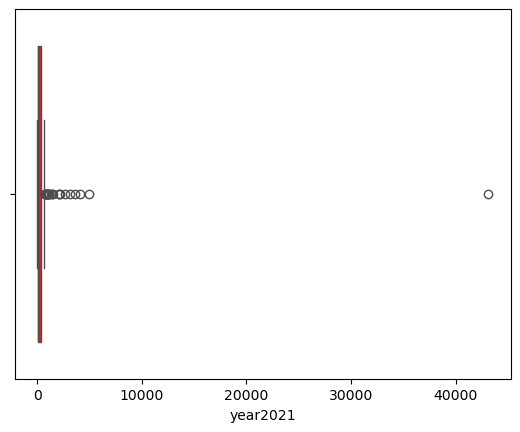

In [40]:
import seaborn as sea

sea.boxplot(deaths_provYear_map.year2021, color='red',orient='h')

<Axes: >

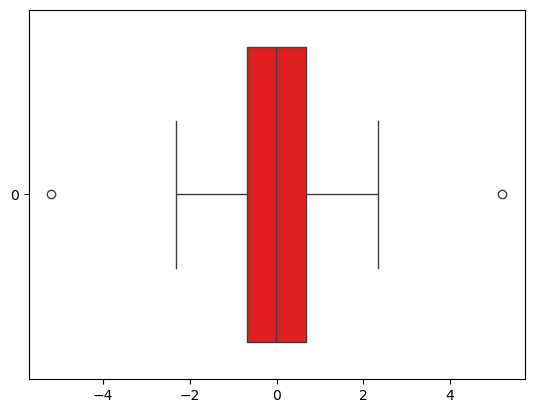

In [41]:
from sklearn.preprocessing import QuantileTransformer

qt_d = QuantileTransformer(n_quantiles=100, random_state=0,output_distribution='normal')
qt_result_d=qt_d.fit_transform(deaths_provYear_map[['year2021']])
sea.boxplot(qt_result_d, color='red',orient='h')

In [42]:
deaths_provYear_map['year_2021_qt']=qt_result_d

### Correlación Espacial

#### Neighboorhood

Rook

In [ ]:
from libpysal.weights import Queen, Rook, KNN
w_rook_d = Rook.from_dataframe(deaths_provYear_map,use_index=False)

Queen

In [ ]:
w_queen_d = Queen.from_dataframe(deaths_provYear_map,use_index=False)

KNN

In [ ]:
w_knn_d = KNN.from_dataframe(deaths_provYear_map, k=8)

In [ ]:
#Revisamos la primera fila

deaths_provYear_map.head(1)

In [ ]:
w_rook_d.neighbors[0]

In [ ]:
# see
base=deaths_provYear_map[deaths_provYear_map.PROVINCIA=="CHACHAPOYAS"].plot()
deaths_provYear_map.iloc[w_rook_d.neighbors[0] ,].plot(ax=base,facecolor="yellow",edgecolor='k')
deaths_provYear_map.head(1).plot(ax=base,facecolor="red")

In [ ]:
w_queen_d.neighbors[0]

In [ ]:
base=deaths_provYear_map[deaths_provYear_map.PROVINCIA=="CHACHAPOYAS"].plot()
deaths_provYear_map.iloc[w_queen_d.neighbors[0] ,].plot(ax=base,facecolor="yellow",edgecolor='k')
deaths_provYear_map.head(1).plot(ax=base,facecolor="red")

In [ ]:
w_knn_d.neighbors[0]

In [ ]:
base=deaths_provYear_map[deaths_provYear_map.PROVINCIA=="CHACHAPOYAS"].plot()
deaths_provYear_map.iloc[w_knn_d.neighbors[0] ,].plot(ax=base,facecolor="yellow",edgecolor='k')
deaths_provYear_map.head(1).plot(ax=base,facecolor="red")

In [ ]:
# all the neighbors by row

w_queen_d.neighbors

In [ ]:
# the Matrix of neighboorhood:

pd.DataFrame(*w_queen_d.full()).astype(int) # 1 means both are neighbors

In [ ]:
# density

w_queen_d.pct_nonzero

In [ ]:
w_queen_d.islands

### Moran's correlation

In [ ]:
w_queen_d.transform = 'R'

In [ ]:
pd.DataFrame(*w_queen_d.full()).sum(axis=1)

In [ ]:
from esda.moran import Moran

moranDEATHS = Moran(deaths_provYear_map['year_2021_qt'], w_queen_d)
moranDEATHS.I,moranDEATHS.p_sim #leerlo como un pearson

In [ ]:
from splot.esda import moran_scatterplot
import matplotlib.pyplot as plt

fig, ax = moran_scatterplot(moranDEATHS)
ax.set_xlabel('DEATHS')
ax.set_ylabel('SpatialLag_DEATHS')

### Local Spatial Correlation

In [ ]:
from esda.moran import Moran_Local

# calculate Moran_Local and plot
lisaDEATHS = Moran_Local(y=deaths_provYear_map['year_2021_qt'], w=w_knn_d,seed=2021)
fig, ax = moran_scatterplot(lisaDEATHS,p=0.05)
ax.set_xlabel('DEATHS')
ax.set_ylabel('SpatialLag_DEATHS');

In [ ]:
from splot.esda import plot_local_autocorrelation
plot_local_autocorrelation(lisaDEATHS, deaths_provYear_map,'year_2021_qt')
plt.show()

In [ ]:
lisaDEATHS.q #añadir el cuadrante al gdf

In [ ]:
# significance
lisaDEATHS.p_sim

In [ ]:
# quadrant: 1 HH,  2 LH,  3 LL,  4 HL
pd.Series(lisaDEATHS.q).value_counts()

In [ ]:
deaths_provYear_map['DEATHS_quadrant']=[l if p <0.05 else 0 for l,p in zip(lisaDEATHS.q,lisaDEATHS.p_sim)  ]
deaths_provYear_map['DEATHS_quadrant'].value_counts()

In [ ]:
labels = [ '0 no_sig', '1 hotSpot', '2 coldOutlier', '3 coldSpot', '4 hotOutlier']

deaths_provYear_map['DEATHS_quadrant_names']=[labels[i] for i in deaths_provYear_map['DEATHS_quadrant']]

deaths_provYear_map['DEATHS_quadrant_names'].value_counts()

In [ ]:
from matplotlib import colors
myColMap = colors.ListedColormap([ 'ghostwhite', 'red', 'skyblue', 'blue','orange'])


f, ax = plt.subplots(1, figsize=(12,12))


plt.title('Spots and Outliers')

deaths_provYear_map.plot(column='DEATHS_quadrant_names',
                categorical=True,
                cmap=myColMap,
                linewidth=0.1,
                edgecolor='white',
                legend=True,
                legend_kwds={'loc': 'center left',
                             'bbox_to_anchor': (0.7, 0.6)},
                ax=ax)
# Remove axis
ax.set_axis_off()
# Display the map
plt.show()

In [ ]:
deaths_provYear_map.explore("DEATHS_quadrant_names", categorical=True,tooltip='location',cmap=myColMap)

In [ ]:
import folium

map1=deaths_provYear_map[deaths_provYear_map.DEATHS_quadrant_names=='1 hotSpot']
map2=deaths_provYear_map[deaths_provYear_map.DEATHS_quadrant_names=='2 coldOutlier']
map3=deaths_provYear_map[deaths_provYear_map.DEATHS_quadrant_names=='3 coldSpot']
map4=deaths_provYear_map[deaths_provYear_map.DEATHS_quadrant_names=='4 hotOutlier']

m = map1.explore(
    color="red",
    tooltip=False,  # hide tooltip
    popup=["location"],  # (on-click)
    name="hotSpot"  # name of the layer in the map
)

map2.explore(
    m=m, # notice
    color="lightblue",
    tooltip=False,
    popup=["location"],
    name="coldOutlier"
)

map3.explore(
    m=m,
    color="blue",
    tooltip=False,
    popup=["location"],
    name="coldSpot",
)

map4.explore(
    m=m,
    color="orange",
    tooltip=False,
    popup=["location"],
    name="hotOutlier",
)

folium.TileLayer("CartoDB positron", show=False).add_to(m)  # use folium to add alternative tiles
folium.LayerControl(collapsed=True).add_to(m)  # use folium to add layer control

m

### Bivariate LISA

In [ ]:
from esda.moran import Moran_BV

mbi = Moran_BV(deaths_provYear_map['year2020'],  deaths_provYear_map['year2021'],  w_queen_d)
mbi.I,mbi.p_sim

In [ ]:
from esda.moran import Moran_Local_BV

# calculate Moran_Local and plot
lisaDEATHS_bv = Moran_Local_BV(y=deaths_provYear_map['year2020'],
                               x=deaths_provYear_map['year2021'],
                               w=w_queen_d)

fig, ax = moran_scatterplot(lisaDEATHS_bv, p=0.05,aspect_equal=True)

ax.set_xlabel('DEATHS_2021')
ax.set_ylabel('SpatialLag_DEATHS_2020')
plt.show()

In [ ]:
deaths_provYear_map['DEATHS_quadrant_21_22']=[l if p <0.05 else 0 for l,p in zip(lisaDEATHS_bv.q,lisaDEATHS_bv.p_sim)  ]

labels = [ '0 no_sig', '1 hotSpot', '2 coldOutlier', '3 coldSpot', '4 hotOutlier']

deaths_provYear_map['DEATHS_quadrant_21_22_names']=[labels[i] for i in deaths_provYear_map['DEATHS_quadrant_21_22']]

In [ ]:
deaths_provYear_map #Verificamos nuevas columnas

In [ ]:
from matplotlib import colors
myColMap = colors.ListedColormap([ 'ghostwhite', 'red', 'skyblue', 'blue','orange'])


f, ax = plt.subplots(1, figsize=(12,12))


plt.title('Spots and Outliers')

deaths_provYear_map.plot(column='DEATHS_quadrant_21_22_names',
                categorical=True,
                cmap=myColMap,
                linewidth=0.1,
                edgecolor='white',
                legend=True,
                legend_kwds={'loc': 'center left',
                             'bbox_to_anchor': (0.7, 0.6)},
                ax=ax)
# Remove axis
ax.set_axis_off()
# Display the map
plt.show()

In [ ]:
deaths_provYear_map.explore("DEATHS_quadrant_21_22_names", categorical=True,tooltip='location',cmap=myColMap)